For the last question will explore what are the relationships of variables with job satisfaction - model will be built and trained and the influential components will be interpretted.

To get started let's read in the necessary libraries and our dataset.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df.shape

(51392, 154)

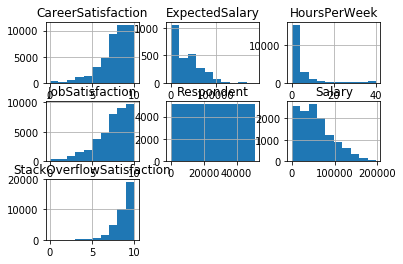

In [33]:
# Let's take a quick look at our data first
df.hist();

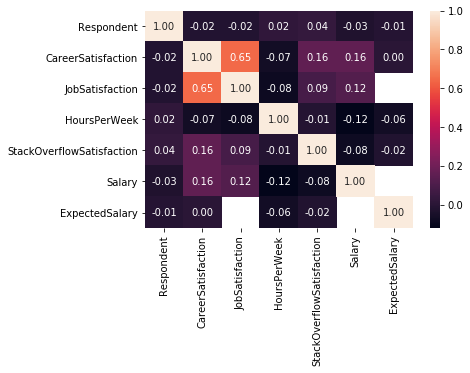

In [34]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

In [35]:
# look above all the numeric variables, ony career satisfaction is highly correlated with 
# predictive factor job satisfaction, which means a lot of sense, that will be one main feature to 
#train our model

In [36]:
#Now let's do some cleansing works, first get rid of the rows and columns with more than 0.7 
#of null values
threshold = 0.7
#Dropping columns with missing value rate higher than threshold
df_1 = df[df.columns[df.isnull().mean() < threshold]]

#Dropping rows with missing value rate higher than threshold
df_1= df_1.loc[df_1.isnull().mean(axis=1) < threshold]

In [37]:
df.shape,df_1.shape

((51392, 154), (40367, 138))

In [38]:
#Based on above threshold, we removed 21% of rows and 10% of column

In [39]:
#let's look at the missing values perc per variable right now, intuitively speaking
#hoursperweek should affect job satisfaction, therefore we need to do some imputation
df_1.isnull().mean().sort_values(ascending=False)

HoursPerWeek                 0.536552
Currency                     0.505289
HaveWorkedFramework          0.500359
InfluenceConsultants         0.476652
InfluenceCommunication       0.475958
InfluenceRecruitment         0.475785
InfluenceServers             0.475710
InfluenceDeptTech            0.475537
InfluenceCloud               0.475438
InfluenceTechStack           0.475264
ResumePrompted               0.475165
InfluenceVizTools            0.474967
InfluenceDatabase            0.474918
InfluenceWorkstation         0.474051
InfluenceHardware            0.473828
AssessJobCommute             0.470087
AssessJobLeaders             0.469740
AssessJobDiversity           0.469715
AssessJobProduct             0.469542
AssessJobProfDevel           0.469468
AssessJobOffice              0.469393
AssessJobRemote              0.468972
AssessJobFinances            0.468923
AssessJobDept                0.467808
AssessJobIndustry            0.467659
AssessJobExp                 0.467535
AssessJobRol

In [40]:
#for numeric variables, use median to replace all the null values, since mean is sensitive to 
#outliers
df_2 = df_1.fillna(df_1.median())

In [41]:
#Max fill function for categorical columns
for i in df_2.select_dtypes(exclude=['int', 'float']).columns:
    
     df_2[i].fillna(df_2[i].value_counts().idxmax(), inplace=True)

In [42]:
#all categorical columns have no null value now
df_2.isnull().mean().sort_values(ascending=False)

InterestedAnswers               0.0
AssessJobCompensation           0.0
AssessJobDiversity              0.0
AssessJobProfDevel              0.0
AssessJobLeaders                0.0
AssessJobRemote                 0.0
AssessJobCommute                0.0
AssessJobOffice                 0.0
AssessJobProjects               0.0
JobSeekingStatus                0.0
AssessJobTech                   0.0
AssessJobDept                   0.0
AssessJobExp                    0.0
AssessJobRole                   0.0
AssessJobIndustry               0.0
LastNewJob                      0.0
AssessJobProduct                0.0
AssessJobFinances               0.0
ImportantBenefits               0.0
ClickyKeys                      0.0
JobProfile                      0.0
ResumePrompted                  0.0
LearnedHiring                   0.0
ImportantHiringAlgorithms       0.0
ImportantHiringTechExp          0.0
ImportantHiringCommunication    0.0
ImportantHiringOpenSource       0.0
ImportantHiringPMExp        

In [43]:
#Now let's get dummy variable for all categorical variable
df_3=pd.get_dummies(df_2.loc[:,df_2.columns != 'JobSatisfaction'])

In [44]:
df_3.shape,df_2.shape

((40367, 41882), (40367, 138))

In [45]:
#after getting dummy variable, the total columns jump from 138 to 41882
X = df_3.loc[:,df_3.columns !='Respondent']
y = df_2['JobSatisfaction']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

params = {'n_estimators': [10, 100, 1000], 'max_depth': [1, 5, 10, 100]}
rf_inst = RandomForestRegressor(n_jobs=-1, verbose=1)
rf_model = GridSearchCV(rf_inst, params, n_jobs=-1) 
rf_model.fit(X_train, y_train)

y_test_preds = rf_model.predict(X_test) 

print(r2_score(y_test, y_test_preds))
#print(mean_squared_error(y_test, y_test_preds)) #metrics to assess fit include Rsquared and MSE.  


In [46]:
### Let's see what be the best number of features to use based on the test set performance
def find_optimal_rf_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True, param_grid=None):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result
    kwargs - include the arguments you want to pass to the rf model
    
    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    rf_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''

    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        if param_grid==None:
            rf_model = RandomForestRegressor()  #no normalizing here, but could tune other hyperparameters

        else:
            rf_inst = RandomForestRegressor(n_jobs=-1, verbose=1)
            rf_model = GridSearchCV(rf_inst, param_grid, n_jobs=-1) 
            
        rf_model.fit(X_train, y_train)
        y_test_preds = rf_model.predict(X_test)
        y_train_preds = rf_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()
        
    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    if param_grid==None:
        rf_model = RandomForestRegressor()  #no normalizing here, but could tune other hyperparameters

    else:
        rf_inst = RandomForestRegressor(n_jobs=-1, verbose=1)
        rf_model = GridSearchCV(rf_inst, param_grid, n_jobs=-1) 
        rf_model.fit(X_train, y_train)
     
    return r2_scores_test, r2_scores_train, rf_model, X_train, X_test, y_train, y_test

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   23.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 184 tasks

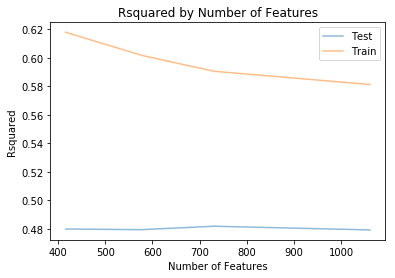

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   40.5s finished


In [47]:
cutoffs = [2500,1000,500,200]
params = {'n_estimators': [50,100,200], 'max_depth': [5,10,50]}
r2_test, r2_train, rf_model, X_train, X_test, y_train, y_test = find_optimal_rf_mod(X, y, cutoffs, param_grid=params)

In [48]:
r2_train

[0.6179057749410675,
 0.6017016832242486,
 0.5905402681234457,
 0.5812301179912593]

In [49]:
r2_test

[0.47983988026930613,
 0.4793964011374777,
 0.4817942581227985,
 0.4792125833862272]

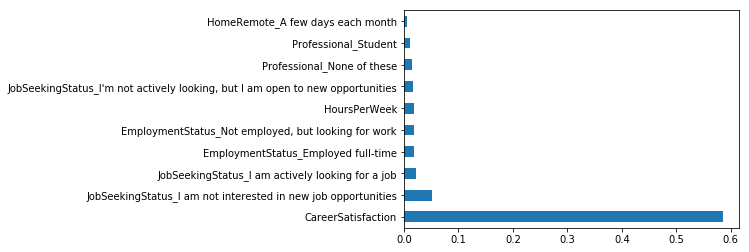

In [50]:
feat_importances = pd.Series(rf_model.best_estimator_.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')